# 3章 顧客の全体像を把握する

In [ ]:
!pip install japanize-matplotlib
!pip install numexpr

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib
import datetime

work_dir = 'WORKING_DIRECTORY'


## 021. データの読み込み

In [3]:
campaign_master = pd.read_csv(f'{work_dir}/campaign_master.csv')
campaign_master.head()

,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


In [4]:
class_master = pd.read_csv(f'{work_dir}/class_master.csv')
class_master.head()

,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [5]:
customer_master = pd.read_csv(f'{work_dir}/customer_master.csv')
customer_master.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [6]:
use_log = pd.read_csv(f'{work_dir}/use_log.csv')
use_log.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


## 022. 顧客データの整形

In [7]:
# customer, class, campaignデータを結合
customer_class = pd.merge(customer_master, class_master, on='class', how='left')
customer_data = pd.merge(customer_class, campaign_master, on='campaign_id', how='left')
customer_data['start_date'] = pd.to_datetime(customer_data['start_date'])
customer_data['end_date'] = pd.to_datetime(customer_data['end_date'])
customer_data.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常


In [8]:
customer_data.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

## 023. 顧客データの集計

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64


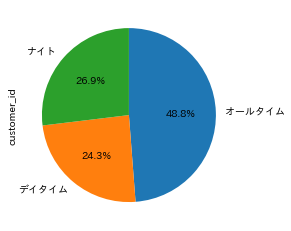

In [9]:
print(customer_data.groupby('class_name').count()['customer_id'])
customer_data.groupby('class_name').count()['customer_id'].plot.pie(counterclock=False, startangle=90, autopct='%1.1f%%')

gender
F    1983
M    2209
Name: customer_id, dtype: int64


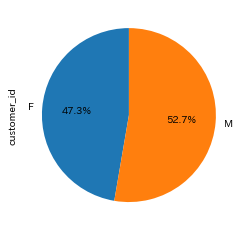

In [10]:
print(customer_data.groupby('gender').count()['customer_id'])
customer_data.groupby('gender').count()['customer_id'].plot.pie(startangle=90, autopct='%1.1f%%')

campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64


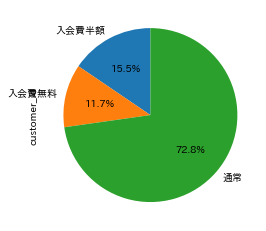

In [11]:
print(customer_data.groupby('campaign_name').count()['customer_id'])
customer_data.groupby('campaign_name').count()['customer_id'].plot.pie(startangle=90, autopct='%1.1f%%')

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64


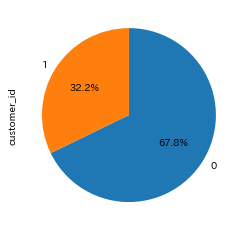

In [12]:
print(customer_data.groupby('is_deleted').count()['customer_id'])
customer_data.groupby('is_deleted').count()['customer_id'].plot.pie(counterclock=False, startangle=90, autopct='%1.1f%%')

price
6000     1128
7500     1019
10500    2045
Name: customer_id, dtype: int64


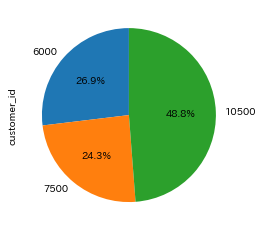

In [13]:
print(customer_data.groupby('price').count()['customer_id'])
customer_data.groupby('price').count()['customer_id'].plot.pie(startangle=90, autopct='%1.1f%%')

### 上記集計結果から分かったこと
- 入会クラスをみると、「オールタイム」が約50%、「デイタイム」と「ナイト」がそれぞれ約25%
- 顧客の性別の分布として、少し男性の方が多い
- 72.8%の顧客が「通常」のキャンペーンから入会しており、「入会費無料」より「入会費半額」のキャンペーンから入会している顧客が多い
- 今までで入会した顧客のうち、約30%の顧客が退会している
- 入会費をみると、「10500」が約50%、「6000」と「7500」がそれぞれ約25%

### 上記集計結果からでは分からないこと
- 各キャンペーンの開催時期や頻度、期間など
- 性別と入会クラス、キャンペーンの関係
- 退会した顧客にはどのような要素が多く含まれているのか
- 最近の傾向

## 024. 最新顧客データの集計

In [14]:
customer_data.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常


In [15]:
customer_data['end_date'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    1350
unique                     12
top       2019-02-28 00:00:00
freq                      149
first     2018-04-30 00:00:00
last      2019-03-31 00:00:00
Name: end_date, dtype: object

In [16]:
customer_newer = customer_data.query(' "2019-03-31" <= end_date or end_date.isna() ', engine='python')
customer_newer.sample(n=10)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
1136,HD436260,XXXX,C02,M,2016-11-01,NaT,CA1,0,デイタイム,7500,通常
2674,HI355741,XXXXX,C02,F,2018-02-01,NaT,CA1,0,デイタイム,7500,通常
3993,OA886981,XXXX,C02,F,2019-01-06,NaT,CA1,0,デイタイム,7500,通常
3772,OA332032,XXX,C03,M,2018-11-07,NaT,CA1,0,ナイト,6000,通常
1254,OA061841,XXXX,C01,M,2016-12-01,NaT,CA1,0,オールタイム,10500,通常
1077,PL746077,XXXXX,C01,M,2016-10-01,NaT,CA1,0,オールタイム,10500,通常
2776,HI844112,XXX,C01,M,2018-03-01,NaT,CA1,0,オールタイム,10500,通常
760,TS181580,XXX,C01,F,2016-05-01,NaT,CA1,0,オールタイム,10500,通常
4042,TS817249,XXXXXX,C02,F,2019-01-13,NaT,CA1,0,デイタイム,7500,通常
238,TS621030,XXXX,C02,F,2015-09-01,NaT,CA1,0,デイタイム,7500,通常


In [17]:
customer_newer['end_date'].value_counts(dropna=False)

NaT           2842
2019-03-31     111
Name: end_date, dtype: int64

class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64


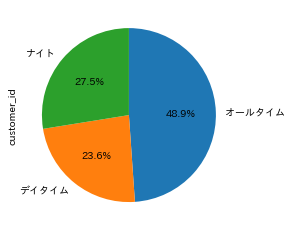

In [18]:
print(customer_newer.groupby('class_name').count()['customer_id'])
customer_newer.groupby('class_name').count()['customer_id'].plot.pie(counterclock=False, startangle=90, autopct='%1.1f%%')

gender
F    1400
M    1553
Name: customer_id, dtype: int64


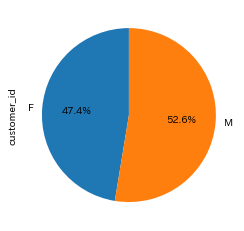

In [19]:
print(customer_newer.groupby('gender').count()['customer_id'])
customer_newer.groupby('gender').count()['customer_id'].plot.pie(startangle=90, autopct='%1.1f%%')

campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64


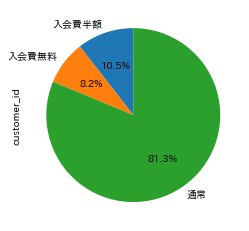

In [20]:
print(customer_newer.groupby('campaign_name').count()['customer_id'])
customer_newer.groupby('campaign_name').count()['customer_id'].plot.pie(startangle=90, autopct='%1.1f%%')

is_deleted
0    2842
1     111
Name: customer_id, dtype: int64


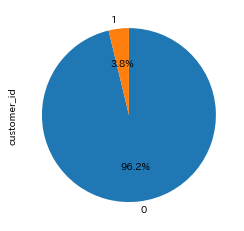

In [21]:
print(customer_newer.groupby('is_deleted').count()['customer_id'])
customer_newer.groupby('is_deleted').count()['customer_id'].plot.pie(counterclock=False, startangle=90, autopct='%1.1f%%')

price
6000      813
7500      696
10500    1444
Name: customer_id, dtype: int64


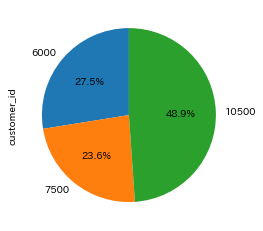

In [22]:
print(customer_newer.groupby('price').count()['customer_id'])
customer_newer.groupby('price').count()['customer_id'].plot.pie(startangle=90, autopct='%1.1f%%')

### 上記集計結果から分かったこと
- クラスの分布に特段の変わりはない
- 性別の分布に特段の変わりはない
- キャンペーンの分布が異なる（「通常」からの顧客が増加した）
- 退会顧客の分布が大きく異なる（「退会」顧客が減少した）
- キャンペーンが退会に影響しているかもしれない
- 最近は、退会顧客の割合が少ないかもしれない

## 025. 利用履歴データを集計

In [23]:
use_log.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [24]:
use_log['usedate'] = pd.to_datetime(use_log['usedate'])
# 年月ごとの各顧客の利用回数を集計
use_log['usedate_ym'] = use_log['usedate'].dt.strftime('%Y/%m')
uselog_months = use_log.groupby(['usedate_ym', 'customer_id'], as_index=False).count().rename(columns={'log_id': 'count'})
del uselog_months['usedate']
uselog_months.head()

,usedate_ym,customer_id,count
0,2018/04,AS002855,4
1,2018/04,AS009013,2
2,2018/04,AS009373,3
3,2018/04,AS015315,6
4,2018/04,AS015739,7


In [25]:
# 年月ごとの利用回数から「平均」、「中央値」、「最小値」、「最大値」を集計
uselog_customer = uselog_months.groupby('customer_id').agg(['mean', 'median', 'min', 'max'])['count'].reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,min,max
0,AS002855,4.500000,5.0,2,7
1,AS008805,4.000000,4.0,1,8
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,3,7
4,AS015233,7.545455,7.0,4,11


## 026. 利用履歴データから定期利用フラグを作成

In [26]:
use_log.head()

,log_id,customer_id,usedate,usedate_ym
0,L00000049012330,AS009373,2018-04-01,2018/04
1,L00000049012331,AS015315,2018-04-01,2018/04
2,L00000049012332,AS040841,2018-04-01,2018/04
3,L00000049012333,AS046594,2018-04-01,2018/04
4,L00000049012334,AS073285,2018-04-01,2018/04


In [27]:
# 年月ごとに顧客が利用している曜日の集計
use_log['weekday'] = use_log['usedate'].dt.weekday
uselog_weekday = use_log.groupby(['customer_id', 'usedate_ym', 'weekday'], as_index=False).count().rename(columns={'log_id': 'count'})
del uselog_weekday['usedate']
uselog_weekday.head()

,customer_id,usedate_ym,weekday,count
0,AS002855,2018/04,5,4
1,AS002855,2018/05,2,1
2,AS002855,2018/05,5,4
3,AS002855,2018/06,5,5
4,AS002855,2018/07,1,1


In [28]:
# 同じ曜日に4回/月以上であればroutine=1
uselog_weekday = uselog_weekday.groupby('customer_id', as_index=False).max()[['customer_id', 'count']]
uselog_weekday['routine'] = uselog_weekday['count'].map(lambda x: 1 if 4 <= x else 0)
uselog_weekday.head()

,customer_id,count,routine
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


## 027. 顧客データと利用履歴データの結合

In [29]:
customer_data = pd.merge(customer_data, uselog_customer, on='customer_id', how='left')
customer_data = pd.merge(customer_data, uselog_weekday, on='customer_id', how='left')
customer_data.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,min,max,count,routine
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,2,8,4,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,3,7,5,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,3,6,5,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,2,7,5,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,1,6,5,1


In [30]:
customer_data.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
min                 0
max                 0
count               0
routine             0
dtype: int64

## 028. 会員期間を計算

In [31]:
from dateutil.relativedelta import relativedelta

customer_data['calc_date'] = customer_data['end_date'].fillna(pd.to_datetime('20190430'))
customer_data['membership_period'] = 0
for i, customer in customer_data.iterrows():
  delta = relativedelta(customer['calc_date'], customer['start_date'])
  customer_data['membership_period'].iloc[i] = delta.years*12 + delta.months
customer_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,min,max,count,routine,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,2,8,4,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,3,7,5,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,3,6,5,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,2,7,5,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,1,6,5,1,2019-04-30,47


## 029. 顧客行動の各種統計量の把握

In [32]:
customer_data.describe()

,is_deleted,price,mean,median,min,max,count,routine,membership_period
count,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000
mean,0.322042,8559.875954,5.333127,5.250596,3.041269,7.823950,4.334208,0.814170,18.835878
std,0.467315,1968.128971,1.777533,1.874874,1.951565,2.168959,1.087748,0.389016,13.848148
min,0.000000,6000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,6000.000000,4.250000,4.000000,2.000000,7.000000,4.000000,1.000000,7.000000
50%,0.000000,7500.000000,5.000000,5.000000,3.000000,8.000000,5.000000,1.000000,15.000000
75%,1.000000,10500.000000,6.416667,6.500000,4.000000,9.000000,5.000000,1.000000,30.000000
max,1.000000,10500.000000,12.000000,12.000000,12.000000,14.000000,5.000000,1.000000,47.000000


routine
0     779
1    3413
Name: customer_id, dtype: int64


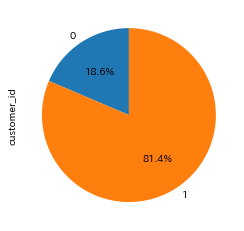

In [33]:
# 定期利用している顧客の分布
print(customer_data.groupby('routine').count()['customer_id'])
customer_data.groupby('routine').count()['customer_id'].plot.pie(startangle=90, autopct='%1.1f%%')

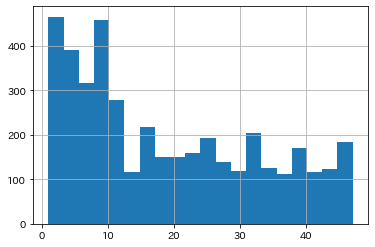

In [34]:
# 会員期間の分布
customer_data['membership_period'].hist(bins=20)

## 030. 退会顧客と継続顧客の違いを把握

In [35]:
# 継続顧客の統計量
customer_data.query(' is_deleted == 0 ').describe()

,is_deleted,price,mean,median,min,max,count,routine,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,3.620690,8.471147,4.865588,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,2.030488,1.571048,0.406154,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,1.000000,5.000000,2.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,2.000000,7.000000,5.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,3.000000,8.000000,5.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,5.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,12.000000,14.000000,5.000000,1.000000,47.000000


In [36]:
# 退会顧客の統計量
customer_data.query(' is_deleted == 1 ').describe()

,is_deleted,price,mean,median,min,max,count,routine,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,1.821481,6.461481,3.215556,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,0.976361,2.584021,1.217087,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,1.000000,4.000000,2.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,2.000000,7.000000,3.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,2.000000,8.000000,4.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,8.000000,13.000000,5.000000,1.000000,23.000000


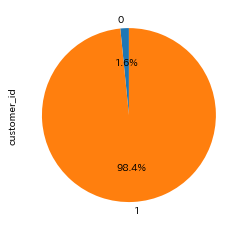

In [37]:
customer_data.query(' is_deleted == 0 ').groupby('routine').count()['customer_id'].plot.pie(startangle=90, autopct='%1.1f%%')

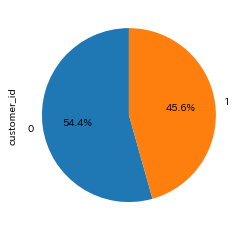

In [38]:
customer_data.query(' is_deleted == 1 ').groupby('routine').count()['customer_id'].plot.pie(startangle=90, autopct='%1.1f%%')

### 上記統計量から分かること
- 継続顧客と退会顧客で、値段(price)による影響はほとんどない（つまり、入会クラス(class_name)にも関係ない）
- 継続顧客の月毎の平均利用回数の平均(mean)は最低3回、平均6回利用しているが、退会顧客は最低1回、平均3回しか利用していない（平均利用回数の中央値(median)、最小値(min)、最大値(max)も同様の差がある）
- 継続顧客はほとんど定期利用(routine)しているが、退会顧客は定期利用の割合が少ない
- 継続顧客は平均で23ヶ月利用しているが、退会顧客は平均8ヶ月利用している

In [39]:
# csvへ出力
#customer_data.to_csv(f'{work_dir}/customer_data.csv', index=False)